### Install Dependencies

In [27]:
!pip3 install torch torchvision torchaudio

In [29]:
!git clone https://github.com/ultralytics/yolov5 

!cd /Users/mxxxxx/Desktop/Yolo/yolov5 

!pip3 install -r /Users/mxxxxx/Desktop/Yolo/yolov5/requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np
import uuid
import os
import time

from ultralytics import YOLO


### Load the Yolo model v5

In [28]:
# load the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


### Use model to detect general images

In [32]:
img = 'https://www.orfonline.org/public/uploads/posts/image/Mumbai-traffic.jpg'

In [2]:
results = model(img)
print(results)

<function matplotlib.pyplot.show(close=None, block=None)>

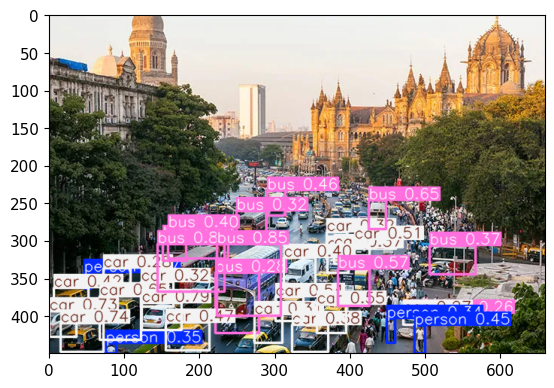

In [35]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show


In [36]:
np.array(results.render()).shape

(1, 450, 660, 3)

### Capture image from web cam (Mac)

In [26]:

cap = cv2.VideoCapture(1) # Device 1 to be set when using Mac cam

# Setting frame width and height
frame_width = 640   # pixels
frame_height = 480  

# Set the frame
cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)

while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



## Create image dataset 

Create realtime image head pose for awake and drowsy images. Also label the images in yolo format

In [4]:
IMAGES_PATH = os.path.join('data', 'images') # two folders where we will save image for dataset labeling and training
labels = ['awake', 'drowsy']
number_imgs = 5 # Images for capture


In [20]:
# This sgould load the cam and capture images every 2sec -> Awake and Drowsy
cap = cv2.VideoCapture(1)
# Loop through labels
for label in labels:
    print('collecting images for {}'.format(label))
    time.sleep(5) # 5sec delay transitioning from pose chang from awake to drowsy
    # Loop through image frmames as pre-defined
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read() # Capture 

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') # Create unique index for the images
        
        cv2.imwrite(imgname, frame)
        cv2.imshow('image Collection', frame) # Render cap images to the screen
        time.sleep(2) # 2 sec delay b/w captures 

        if cv2.waitKey(60) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()        



collecting images for awake
collecting images for drowsy


In [8]:
# Clone repository - labelImg
# to label the images
! git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 5 (delta 0), pack-reused 2090 (from 1)
Receiving objects: 100% (2097/2097), 237.14 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [34]:
# Install dependencies

# MAC specific config
# pip3 install pyqt5 lxml # Install qt and lxml by pip
# make qt5py3
# python3 labelImg.py
# python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

!pip3 install pyqt5 lxml

## Load custom dataset
Load a custom model and train and validate on the custom dataset
Also need to create dataset.yml file for the dataset and object classes 
https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/

In [5]:
!cd yolov5 # Load directory

## Train model on custom dataset
# Total Dataset image
    # Awake - 25
    # Drowsy - 25

!python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

In [3]:
## Load the custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/mxxxxx/Desktop/Yolo/yolov5/runs/train/exp5/weights/best.pt', force_reload=True)

In [18]:
# Test a captured image from custom dataset
img = os.path.join('data', 'images', 'awake.6390366c-7ca1-11ef-8429-823a97a76ebe.jpg')

In [20]:
results = model(img)
results.print()

image 1/1: 720x1280 1 awake
Speed: 19.1ms pre-process, 119.7ms inference, 0.9ms NMS per image at shape (1, 3, 384, 640)


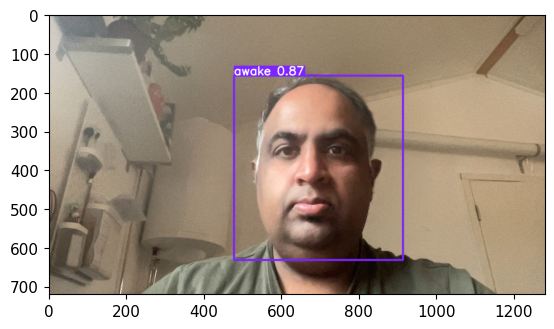

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
## LIVE cam drowziness detection
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()